In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import time

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ML_DM/data/data_normalized.csv")

In [ ]:
data.head()

,id,comment,label,comment_normalize
0,train_000000,Dung dc sp tot cam on \nshop Đóng gói sản phẩm...,0,dung sản_phẩm cam on cửa_hàng đóng_gói sản_phẩ...
1,train_000001,Chất lượng sản phẩm tuyệt vời . Son mịn nhưng...,0,chất_lượng sản_phẩm tuyệt_vời son mịn đánh màu...
2,train_000002,Chất lượng sản phẩm tuyệt vời nhưng k có hộp ...,0,chất_lượng sản_phẩm tuyệt_vời hộp dây giày đen...
3,train_000003,:(( Mình hơi thất vọng 1 chút vì mình đã kỳ vọ...,1,nagative hơi thất_vọng 1 chút kỳ_vọng sách hi_...
4,train_000004,Lần trước mình mua áo gió màu hồng rất ok mà đ...,1,mua áo_gió màu hồng o đợt giao 2 áo_gió chất v...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16087 entries, 0 to 16086
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 16087 non-null  object
 1   comment            16087 non-null  object
 2   label              16087 non-null  int64 
 3   comment_normalize  16047 non-null  object
dtypes: int64(1), object(3)
memory usage: 502.8+ KB


In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16047 entries, 0 to 16086
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 16047 non-null  object
 1   comment            16047 non-null  object
 2   label              16047 non-null  int64 
 3   comment_normalize  16047 non-null  object
dtypes: int64(1), object(3)
memory usage: 626.8+ KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.comment_normalize, data.label, test_size=0.3,random_state=42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1,random_state=42)

In [ ]:
print(X_train.count())
print(X_valid.count())
print(X_test.count())


10108
1124
4815


# LogisticRegression

In [ ]:
steps = []
steps.append(('CountVectorizer', CountVectorizer()))
steps.append(('tfidf', TfidfTransformer()))
steps.append(('classifier',  LogisticRegression(random_state=1)))
clf = Pipeline(steps)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
report = metrics.classification_report(y_test, y_pred, labels=[1,0], digits=3)

In [ ]:
print('TRAIN',report)
print('Time Train', end - start)

TRAIN               precision    recall  f1-score   support

           1      0.821     0.857     0.839      2066
           0      0.889     0.860     0.874      2749

    accuracy                          0.859      4815
   macro avg      0.855     0.858     0.856      4815
weighted avg      0.860     0.859     0.859      4815

Time Train 0.8095059394836426


In [ ]:
cross_score = cross_val_score(clf, X_train,y_train, cv=5)

In [ ]:
print("CROSSVALIDATION 5 FOLDS: %0.4f (+/- %0.4f)" % (cross_score.mean(), cross_score.std() * 2))

CROSSVALIDATION 5 FOLDS: 0.8689 (+/- 0.0108)


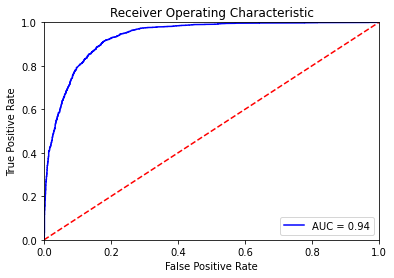

In [ ]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
with open("testPickleFile", 'wb') as f:
  pickle.dump(a, f)  

In [ ]:
pickle.dump(clf, open("/content/drive/MyDrive/ML_DM/models/LogisticRegression.pkl", 'wb'))

# Naive Bayes

In [ ]:
steps = []
steps.append(('CountVectorizer', CountVectorizer()))
steps.append(('tfidf', TfidfTransformer()))
steps.append(('classifier',  MultinomialNB()))
clf = Pipeline(steps)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
report = metrics.classification_report(y_test, y_pred, labels=[1,0], digits=3)

In [ ]:
print('TRAIN',report)
print('Time Train', end - start)

TRAIN               precision    recall  f1-score   support

           1      0.853     0.758     0.803      2066
           0      0.832     0.902     0.866      2749

    accuracy                          0.840      4815
   macro avg      0.843     0.830     0.834      4815
weighted avg      0.841     0.840     0.839      4815

Time Train 0.15828466415405273


In [ ]:
cross_score = cross_val_score(clf, X_train,y_train, cv=5)
print("CROSSVALIDATION 5 FOLDS: %0.4f (+/- %0.4f)" % (cross_score.mean(), cross_score.std() * 2))

CROSSVALIDATION 5 FOLDS: 0.8532 (+/- 0.0102)


In [ ]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
with open("testPickleFile", 'wb') as f:
  pickle.dump(a, f)  
pickle.dump(clf, open("/content/drive/MyDrive/ML_DM/models/LogisticRegression.pkl", 'wb'))

# SVM

In [ ]:
steps = []
steps.append(('CountVectorizer', CountVectorizer(ngram_range=(1,5) ,max_df=0.5, min_df=5)))
steps.append(('tfidf', TfidfTransformer(use_idf=False, sublinear_tf = True,norm='l2',smooth_idf=True)))
steps.append(('classifier',  LinearSVC(dual=False, tol=1e-3, penalty="l2", loss='squared_hinge')))
clf = Pipeline(steps)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
report = metrics.classification_report(y_test, y_pred, labels=[1,0], digits=3)

In [ ]:
print('TRAIN',report)
print('Time Train', end - start)

TRAIN               precision    recall  f1-score   support

           1      0.825     0.839     0.832      2066
           0      0.878     0.866     0.872      2749

    accuracy                          0.855      4815
   macro avg      0.851     0.853     0.852      4815
weighted avg      0.855     0.855     0.855      4815

Time Train 0.7113244533538818


In [ ]:
cross_score = cross_val_score(clf, X_train,y_train, cv=5)
print("CROSSVALIDATION 5 FOLDS: %0.4f (+/- %0.4f)" % (cross_score.mean(), cross_score.std() * 2))

CROSSVALIDATION 5 FOLDS: 0.8617 (+/- 0.0166)


In [ ]:
pickle.dump(clf, open("/content/drive/MyDrive/ML_DM/models/LinearSVC.pkl", 'wb'))

#Random Forest



In [ ]:
steps = []
steps.append(('CountVectorizer', CountVectorizer(ngram_range=(1,5) ,max_df=0.5, min_df=5)))
steps.append(('tfidf', TfidfTransformer(use_idf=False, sublinear_tf = True,norm='l2',smooth_idf=True)))
steps.append(('classifier',  RandomForestClassifier(n_estimators=200, max_depth=None,random_state=100)))
clf = Pipeline(steps)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
report = metrics.classification_report(y_test, y_pred, labels=[1,0], digits=3)

In [ ]:
print('TRAIN',report)
print('Time Train', end - start)

TRAIN               precision    recall  f1-score   support

           1      0.837     0.817     0.827      2066
           0      0.865     0.880     0.872      2749

    accuracy                          0.853      4815
   macro avg      0.851     0.848     0.849      4815
weighted avg      0.853     0.853     0.853      4815

Time Train 14.589246273040771


In [ ]:
cross_score = cross_val_score(clf, X_train,y_train, cv=5)
print("CROSSVALIDATION 5 FOLDS: %0.4f (+/- %0.4f)" % (cross_score.mean(), cross_score.std() * 2))

CROSSVALIDATION 5 FOLDS: 0.8541 (+/- 0.0116)


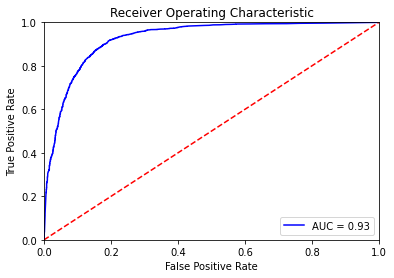

In [ ]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
pickle.dump(clf, open("/content/drive/MyDrive/ML_DM/models/RandomForestClassifier.pkl", 'wb'))

#Ensemble learning

In [ ]:
ensemble_clf = VotingClassifier(
        estimators=[('nb', MultinomialNB()), 
                    ('linearSVM', LinearSVC(dual=False, tol=1e-3, penalty="l2", loss='squared_hinge')),
                    ('rdf', RandomForestClassifier(n_estimators=200, max_depth=None,random_state=100)),
                    ],
        voting='hard')
steps = []
steps.append(('CountVectorizer', CountVectorizer(ngram_range=(1,5) ,max_df=0.5, min_df=5)))
steps.append(('tfidf', TfidfTransformer(use_idf=False, sublinear_tf = True,norm='l2',smooth_idf=True)))
steps.append(('classifier', ensemble_clf))
clf = Pipeline(steps)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
y_pred = clf.predict(X_test)
report = metrics.classification_report(y_test, y_pred, labels=[1,0], digits=3)

In [ ]:
print('TRAIN',report)
print('Time Train', end - start)

TRAIN               precision    recall  f1-score   support

           1      0.832     0.852     0.842      2066
           0      0.887     0.870     0.878      2749

    accuracy                          0.863      4815
   macro avg      0.859     0.861     0.860      4815
weighted avg      0.863     0.863     0.863      4815

Time Train 14.996941566467285


In [ ]:
cross_score = cross_val_score(clf, X_train,y_train, cv=5)
print("CROSSVALIDATION 5 FOLDS: %0.4f (+/- %0.4f)" % (cross_score.mean(), cross_score.std() * 2))

CROSSVALIDATION 5 FOLDS: 0.8698 (+/- 0.0153)


In [ ]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
pickle.dump(clf, open("/content/drive/MyDrive/ML_DM/models/ensemble_clf.pkl", 'wb'))

# BiLSTM

In [ ]:
unique = set()
for text in data['comment_normalize']:
  s = [i for i in text]
  unique.add(frozenset(s)) 
len(unique)

14704

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical

In [ ]:
vocab_size = 1000
one_hot_dir = [one_hot(words, vocab_size) for words in data['comment_normalize']]
embedded_layer = pad_sequences(one_hot_dir,padding = 'pre')
import numpy as np
y = to_categorical(data['label'], num_classes=2)
x = np.array(embedded_layer)

In [ ]:
x

array([[  0,   0,   0, ..., 598,  45, 631],
       [  0,   0,   0, ..., 158, 871, 558],
       [  0,   0,   0, ..., 156, 613, 164],
       ...,
       [  0,   0,   0, ..., 153, 412, 773],
       [  0,   0,   0, ..., 360, 959, 610],
       [  0,   0,   0, ..., 728, 477, 754]], dtype=int32)

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x , y , test_size=0.3, random_state=0)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train , y_train , test_size=0.1, random_state=0)

In [ ]:
y_valid

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
rnn_size = 256 # size of RNN
seq_length = 200 # sequence length
learning_rate = 0.001 #learning rate

In [ ]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(vocab_size, 64, input_length = len(embedded_layer[0])))
model.add(Bidirectional(LSTM(rnn_size, activation="relu")))
model.add(Dropout(0.6))
model.add(Dense(2,activation="sigmoid"))

optimizer = Adam(lr=learning_rate)
callbacks=[EarlyStopping(patience=2, monitor='val_loss')]
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 315, 64)           64000     
                                                                 
 bidirectional (Bidirectiona  (None, 512)              657408    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 722,434
Trainable params: 722,434
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
#training the model
history = model.fit(X_train, y_train, validation_data = (X_valid ,y_valid), epochs = 5, batch_size = 32)
model.save('BiLSTM64.h5')

Epoch 1/5
316/316 [==============================] - 611s 2s/step - loss: nan - accuracy: 0.5771 - val_loss: nan - val_accuracy: 0.5819
Epoch 2/5
316/316 [==============================] - 613s 2s/step - loss: nan - accuracy: 0.5793 - val_loss: nan - val_accuracy: 0.5819
Epoch 3/5
316/316 [==============================] - 613s 2s/step - loss: nan - accuracy: 0.5793 - val_loss: nan - val_accuracy: 0.5819
Epoch 4/5
170/316 [===============>..............] - ETA: 4:35 - loss: nan - accuracy: 0.5789

KeyboardInterrupt: ignored

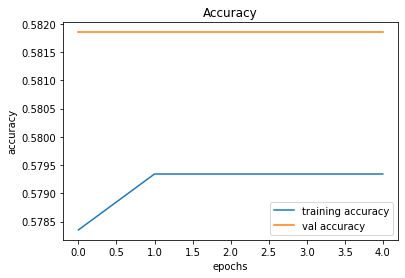

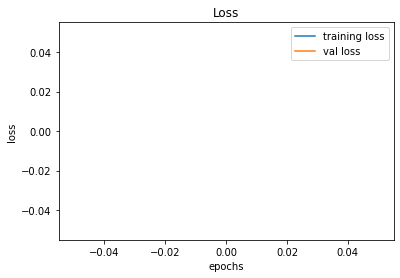

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#LSTM

In [ ]:
pip install wandb

     |████████████████████████████████| 1.7 MB 19.8 MB/s 
     |████████████████████████████████| 180 kB 56.7 MB/s 
     |████████████████████████████████| 142 kB 54.4 MB/s 
     |████████████████████████████████| 97 kB 7.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=f40e84838bb3cc89990e02eb32be89204fdd0e1a85afd4f8264a43504808520d
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=95455509d7fb29acd1435664f82fa10fba3a1faedad5faa91e6c6de8b5bf3361
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, LSTM, Bidirectional
from keras.layers import Conv1D, Flatten,MaxPooling1D
import wandb
from wandb.keras import WandbCallback
import numpy as np
from keras.preprocessing import text

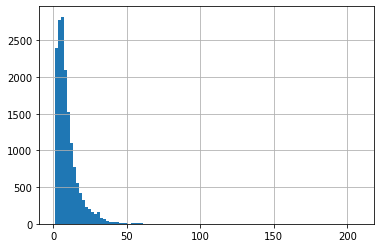

In [ ]:
seq_len = [len(i.split()) for i in data.comment_normalize]
pd.Series(seq_len).hist(bins = 100)
plt.show()

In [ ]:
print([max(seq_len), min(seq_len)])

[208, 1]


In [ ]:
word = set()
for te in data.comment_normalize:
  for i in te.split(" "):
    word.add(i)
print(len(word))
print(word)

11242
{'sophie', 'ncc', 'vệt', 'ktks', 'world', 'ngầu', 'tiềnmới', 'met', 'xưng', 'trọng_tâm', 'hề', 'thớt', 'meizu', 'săn', 'bảo_toàn', 'aen', 'cười', 'cân_đối', 'nhác', 'chiệu', 'gởi', 'kết_hợp', 'vờiđóng', 'đợiđi', 'hiccc', 'xà', 'sáo', 'dầu_gội', 'bvs', 'ưu_đãi', '407', 'thuê', 'dẫn_chứng', 'digiworl', '99k', '4800mah', 'nhẵn', 'hiện', 'hậnvkhi', 'khăng_khăng', 'vuong', 'vờinhan', 'khả_quan', 'xúc_động', 'đầukhó', '55', 'vờichất', 'raat', 'nhất_thiết_kế', 'biến_đổi', 'thương_cảm', 'eo_ôi', 'vinahome', 'mùu', 'thường_xuyên', 'lạng', 'kẹp', 'windows', 'rực_rỡ', 'kỳ_ảo', 'trướcthất', 'vờimua', 'dip', 'sốt', 'instax', 'uể_oải', 'nóng_ok', 'nốt', 'augusst', 'tiếp_chuyện', '34', 'su_dụng', 'phun', 'siêuuuuuuu', 'trầm_bổng', 'thí', 'thua', 'ad', 'bo_di', 'nẻdùng', 'nạn_nhân', 'thị_giác', 'đớn', 'hiddentag', 'biến', 'dãy', '16a', 'vòng_vo', 'masters', 'tản_stock', '24', 'bất_tín', 'tết', 'nhàu_nát', 'xướcchạy', 'tụcmỗi', 'tràn', 'sảm', 'bí_quyết', 'chuốt', 'thán', 'winphone', 'gỉ', 'sạn', 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.comment_normalize, data.label, test_size=0.3,random_state=42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1,random_state=42)

In [ ]:
wandb.init()
config = wandb.config

config.vocab_size = 10000
config.maxlen = 200
config.batch_size = 32
config.embedding_dims = 50
config.filters = 10
config.kernel_size = 3
config.hidden_dims = 10
config.epochs = 10

accuracy,▁▆▇▇▇█▇███
epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▂▁▁▁
val_accuracy,▁▂▄▅▅▅▇██▇
val_loss,█▃▃▃▂▂▂▁▁▁
accuracy,0.90305
best_epoch,9
best_val_loss,0.31121
epoch,9
loss,0.24647
val_accuracy,0.86922


In [ ]:
tokenizer = text.Tokenizer(num_words=config.vocab_size, split=' ')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = sequence.pad_sequences(X_train, maxlen=config.maxlen)
X_valid = sequence.pad_sequences(X_valid, maxlen=config.maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=config.maxlen)
 

In [ ]:
X_train[9]

In [ ]:
X_test[200]

In [ ]:
X_valid[9]

In [ ]:
len(X_train[9])

In [ ]:
model = Sequential()
model.add(Embedding(config.vocab_size,
                    config.embedding_dims,
                    input_length=config.maxlen))
model.add(Conv1D(config.filters,
                 config.kernel_size,
                 padding='valid',
                 activation='relu'))
model.add(MaxPooling1D())s
model.add(LSTM(config.hidden_dims, activation="sigmoid"))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=config.batch_size,
          epochs=config.epochs,
          validation_data=(X_valid, y_valid), callbacks=[WandbCallback()])
model.save('LSTM1.h5')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 200, 50)           500000    
                                                                 
 conv1d_7 (Conv1D)           (None, 198, 10)           1510      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 99, 10)           0         
 1D)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 10)                840       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 502,361
Trainable params: 502,361
Non-trainable params: 0
________________________________________________

In [ ]:
print(report)

              precision    recall  f1-score   support

           0      0.890     0.852     0.871      2749
           1      0.814     0.860     0.836      2066

    accuracy                          0.856      4815
   macro avg      0.852     0.856     0.854      4815
weighted avg      0.858     0.856     0.856      4815



In [ ]:
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_valid)
test_predictions = model.predict(X_test)


val_predictions = val_predictions.argmax(axis=-1)
test_predictions = test_predictions.argmax(axis=-1)

print("Validation accuracy: ", metrics.accuracy_score(val_predictions, y_valid))
print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))

Validation accuracy:  0.5827402135231317
Test accuracy:  0.5709241952232607


## LSTM thêm dropout giảm overfiting

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
model = Sequential()
model.add(Embedding(config.vocab_size,
                    config.embedding_dims,
                    input_length=config.maxlen))
model.add(Conv1D(config.filters,
                 config.kernel_size,
                 padding='valid',
                 activation='relu'))
model.add(MaxPooling1D())
model.add(SpatialDropout1D(0.4))
model.add(LSTM(config.hidden_dims, activation="sigmoid", dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(X_train, y_train,
          batch_size=config.batch_size,
          epochs=config.epochs,
          validation_data=(X_valid, y_valid), callbacks=[WandbCallback()])
model.save('LSTM2.h5')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 50)           500000    
                                                                 
 conv1d_8 (Conv1D)           (None, 198, 10)           1510      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 99, 10)           0         
 1D)                                                             
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 99, 10)           0         
 lDropout1D)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 10)                840       
                                                                 
 dense_8 (Dense)             (None, 1)                

In [ ]:
y_pred = model.predict(X_test)
y_pred = [ [1 if x > 0.5 else 0] for x in y_pred] 
report = metrics.classification_report(y_test, y_pred, digits=3)
print(report)


              precision    recall  f1-score   support

           0      0.890     0.852     0.871      2749
           1      0.814     0.860     0.836      2066

    accuracy                          0.856      4815
   macro avg      0.852     0.856     0.854      4815
weighted avg      0.858     0.856     0.856      4815

